In [126]:
import os
import re
import csv
import time
import requests
import seaborn as sns
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

# Crawling Data

*Read Url*

In [61]:
def readUrl(url):
    headers = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'})
    r = requests.get(url, headers = headers)
    while r.status_code != 200:
      time.sleep(15)
      r = requests.get(url, headers = headers)
    return r

*Scrap data*

In [ ]:
if not os.path.isfile('data.csv'):
    csv_file = open('data.csv', 'w', newline='', encoding='utf-8')
    csv_writer = csv.DictWriter(csv_file, ['Title','Market', 'Inner Storage', 'Card Storage', 'Available', 'Cost Effective Score', 
                                           'Design Material Score', 'Average Score', 'Camera Score', 'Connectivity Score', 
                                           'Battery Score', 'Size','Weight', 'Battery Storage'])
    csv_writer.writeheader()
    csv_file.close()

    with open('data.csv', "a", newline='') as fp:            
        wr_data = csv.writer(fp, dialect='excel')            
        for page_num in range(256):
            time.sleep(1)
            url = 'https://www.kimovil.com/en/compare-smartphones/page.{}?xhr=1'.format(page_num)
            print(url)
            r = readUrl(url)
            soup = BeautifulSoup(r.json()['content'], 'html.parser')    
            items = soup.find_all('div', class_='item-wrap')
            
            for item in items:
                item_name = item.find('div', class_='device-name')
                try: 
                    title = item_name.find('div', class_='title').text
                except:
                    title = ''
                
                market = ''
                inner_store = ''
                card_store = ''
                try:
                    item_version = item_name.find('div', class_='version')
                    market = item_version.find('span').text
                    inner_store = int(re.findall(r'\d+', item_version.text)[0])
                    card_store = int(re.findall(r'\d+', item_version.text)[1])
                except:
                    pass

                try:
                    status_available = item_name.find('div', class_ = 'status available').text
                    if 'year' in status_available:
                        status_available = int(re.findall(r'\d+', status_available)[0])*12
                    else:
                        status_available = int(re.findall(r'\d+', status_available)[0])
                except:
                    status_available = 0
                
                device_data = item.find('div', class_='miniki')
                scores = BeautifulSoup(device_data['data-minikiinfo'], 'html.parser').find_all('span', class_='score')
                
                cost_effective_score = ''
                design_material_score = ''
                average_score = ''
                camera_score = ''
                connectivity_score = ''
                battery_score = ''
                
                try:
                    cost_effective_score = float(scores[0].text)
                    design_material_score = float(scores[1].text)
                    average_score = float(scores[2].text)
                    camera_score = float(scores[3].text)
                    connectivity_score = float(scores[4].text)
                    battery_score = float(scores[5].text)    
                except:
                    pass        
                        
                ki_features = re.findall(r"[-+]?(?:\d*\.*\d+)", item.find('div', class_='ki-features').text)
                size = ''
                weight = ''
                batteryStorage = ''
                try:
                    size = float(ki_features[0])
                    weight = float(ki_features[1])
                    batteryStorage = float(ki_features[2])
                except:
                    pass

                record = [title, market, inner_store, card_store, status_available, cost_effective_score, design_material_score,
                        average_score, camera_score, connectivity_score, battery_score, size, weight, batteryStorage]
                wr_data.writerow(record)


# Data Analysis

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

*Load scraped data*

In [155]:
df = pd.read_csv('data.csv')
target = df['Cost Effective Score']
df.drop(['Cost Effective Score'], axis = 1, inplace=True)
df['Cost Effective Score'] = target
df

,Title,Market,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
0,OnePlus 11,Global,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,10.0
1,OnePlus 11,China,12,256,4,8.9,9.2,8.6,8.6,8.2,6.7,205.0,5000.0,10.0
2,OnePlus 11,N. America,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,9.9
3,OnePlus 11,China,16,512,4,8.9,9.5,8.6,8.6,8.2,6.7,205.0,5000.0,9.8
4,OnePlus 11,Global,8,128,4,8.9,9.1,8.6,9.2,8.2,6.7,205.0,5000.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10337,Nubia Red Magic 7S Pro,Global,12,256,9,7.8,8.9,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
10338,Nubia Red Magic 7S Pro,Global,18,512,9,7.8,9.1,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
10339,Xiaomi 12T,Global,8,128,7,8.1,8.0,7.8,8.7,7.5,6.7,202.0,5000.0,8.8
10340,Asus ROG Phone 6,China,12,256,10,7.0,8.9,7.7,7.4,8.9,6.8,239.0,6000.0,8.8


## EDA (Explanatory Data Analysis)

*Check missing values and remove them*

In [156]:
df_count = pd.DataFrame(df.isnull().sum(),columns=["Count"])
df_count[df_count['Count'] > 0].transpose()

,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Cost Effective Score
Count,2515,2515,2515,2515,2515,2515


In [157]:
df.dropna(inplace=True)
df.reset_index(drop = True, inplace=True)
df

,Title,Market,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
0,OnePlus 11,Global,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,10.0
1,OnePlus 11,China,12,256,4,8.9,9.2,8.6,8.6,8.2,6.7,205.0,5000.0,10.0
2,OnePlus 11,N. America,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,9.9
3,OnePlus 11,China,16,512,4,8.9,9.5,8.6,8.6,8.2,6.7,205.0,5000.0,9.8
4,OnePlus 11,Global,8,128,4,8.9,9.1,8.6,9.2,8.2,6.7,205.0,5000.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7822,Nubia Red Magic 7S Pro,Global,12,256,9,7.8,8.9,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
7823,Nubia Red Magic 7S Pro,Global,18,512,9,7.8,9.1,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
7824,Xiaomi 12T,Global,8,128,7,8.1,8.0,7.8,8.7,7.5,6.7,202.0,5000.0,8.8
7825,Asus ROG Phone 6,China,12,256,10,7.0,8.9,7.7,7.4,8.9,6.8,239.0,6000.0,8.8


The number of records reduced from 10342 to 7827. It shows that 2515 records removed, since they contain missing values.
Now, let remove the products which over two years produced.

In [158]:
df = df.loc[df['Available'] <= 24]
df.drop(['Title', 'Market'], axis=1, inplace=True)
df.reset_index(drop = True, inplace=True)
df

,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
0,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,10.0
1,12,256,4,8.9,9.2,8.6,8.6,8.2,6.7,205.0,5000.0,10.0
2,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,9.9
3,16,512,4,8.9,9.5,8.6,8.6,8.2,6.7,205.0,5000.0,9.8
4,8,128,4,8.9,9.1,8.6,9.2,8.2,6.7,205.0,5000.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4656,12,256,9,7.8,8.9,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
4657,18,512,9,7.8,9.1,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
4658,8,128,7,8.1,8.0,7.8,8.7,7.5,6.7,202.0,5000.0,8.8
4659,12,256,10,7.0,8.9,7.7,7.4,8.9,6.8,239.0,6000.0,8.8


*Plot boxplot to find outliers*

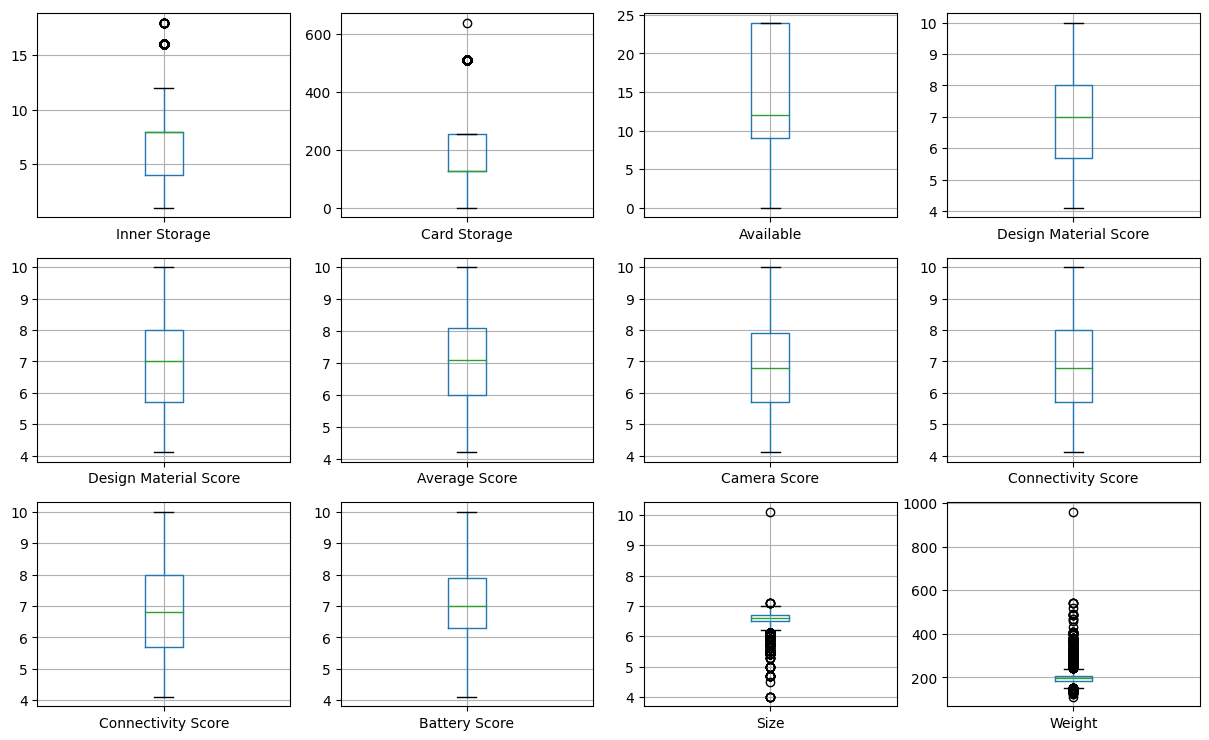

In [159]:
colnames = df.columns
f, axes = plt.subplots(3, 4, figsize=(15, 9), sharey=False)
# Create a boxplot for each continue variable
for i in range(3):
    for j in range(4):
        col = colnames[i * 3 + j]
        df[[col]].boxplot(column=col, ax = axes[i, j])
plt.show()

*Remove outliers*

In [160]:
# Calculate the interquartile range
df_outliers = df.copy()
outliers_num = []
for col in colnames:
    series = df[col]
    Q1 = series.quantile(0.1)
    Q3 = series.quantile(0.9)
    iqr = Q3 - Q1
    lower = Q1 - 1.5 * iqr
    upper = Q3 + 1.5 * iqr
    
    outliers = df.loc[(series < lower) | (series > upper)]
    df_outliers = df_outliers.loc[(series >= lower) & (series <= upper)]
    outliers_num.append(len(outliers))
    

outliers_table = pd.DataFrame(list(zip(colnames, outliers_num)),
               columns =['Columns','Number of Outliers'])

outliers_table

,Columns,Number of Outliers
0,Inner Storage,0
1,Card Storage,1
2,Available,0
3,Design Material Score,0
4,Average Score,0
5,Camera Score,0
6,Connectivity Score,0
7,Battery Score,0
8,Size,39
9,Weight,80


This table shows that there are some oultiers in card storage, size, weight, battery storage features. Let remove these outliers and clean data.

In [161]:
df_outliers.reset_index(drop=True, inplace=True)
df = df_outliers.copy()
df

,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
0,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,10.0
1,12,256,4,8.9,9.2,8.6,8.6,8.2,6.7,205.0,5000.0,10.0
2,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,9.9
3,16,512,4,8.9,9.5,8.6,8.6,8.2,6.7,205.0,5000.0,9.8
4,8,128,4,8.9,9.1,8.6,9.2,8.2,6.7,205.0,5000.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,12,256,9,7.8,8.9,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
4521,18,512,9,7.8,9.1,7.4,8.1,7.7,6.8,235.0,5000.0,8.8
4522,8,128,7,8.1,8.0,7.8,8.7,7.5,6.7,202.0,5000.0,8.8
4523,12,256,10,7.0,8.9,7.7,7.4,8.9,6.8,239.0,6000.0,8.8


4661 - 4525 = 136 rows removed as outliers.

*Statistical Features*

In [162]:
df.describe()

,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
count,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000,4525.000000
mean,7.434033,177.352707,13.766409,6.883448,7.059050,6.796331,6.812508,7.003890,6.556420,198.321326,4736.867182,7.251337
std,3.420486,123.834636,7.687964,1.413803,1.284757,1.375816,1.349258,1.043604,0.246032,24.188559,637.192153,1.192789
min,1.000000,1.000000,0.000000,4.100000,4.200000,4.100000,4.100000,4.200000,5.400000,110.000000,2227.000000,4.800000
25%,4.000000,128.000000,9.000000,5.800000,6.100000,5.700000,5.700000,6.300000,6.500000,185.000000,4500.000000,6.300000
50%,8.000000,128.000000,12.000000,7.100000,7.100000,6.800000,6.800000,7.000000,6.600000,195.000000,5000.000000,7.300000
75%,8.000000,256.000000,24.000000,8.000000,8.100000,8.000000,8.000000,7.800000,6.700000,206.000000,5000.000000,8.200000
max,18.000000,512.000000,24.000000,10.000000,10.000000,10.000000,10.000000,9.100000,7.100000,320.000000,7700.000000,10.000000


*Plot density graph of countinuous variables*

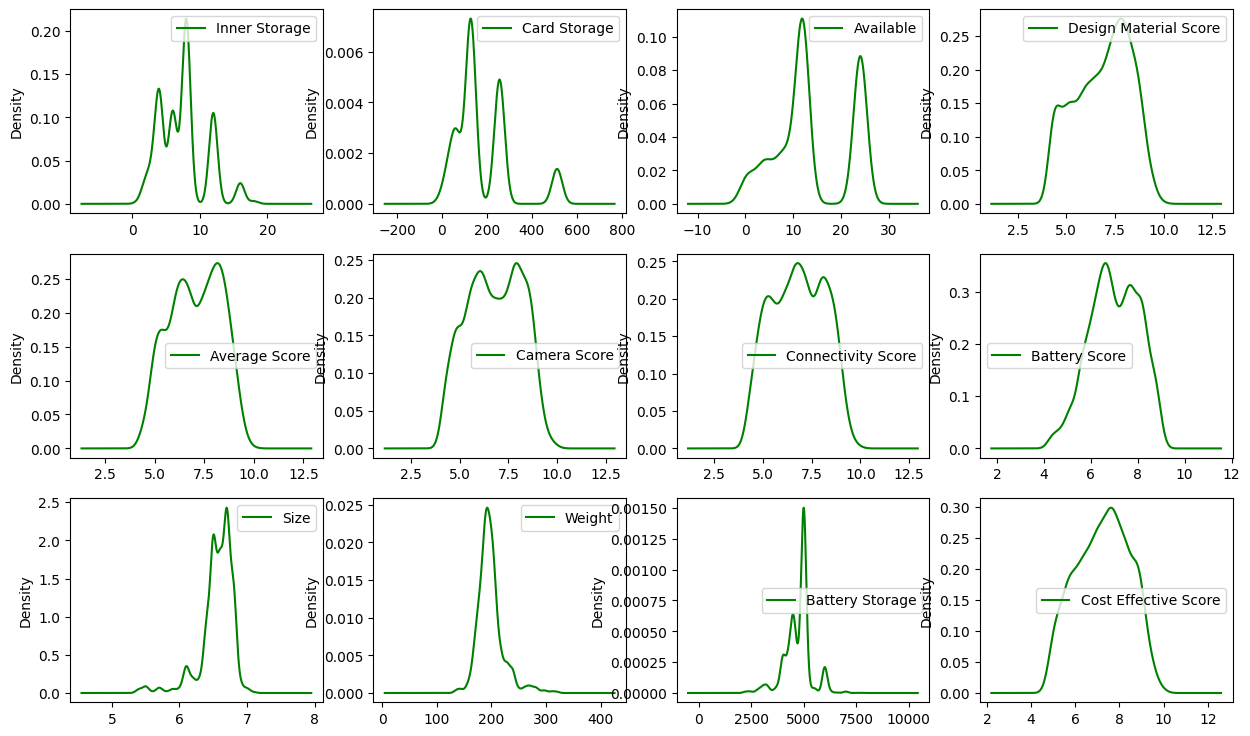

In [163]:
f, axes = plt.subplots(3, 4, figsize=(15, 9), sharey=False)
for i in range(3):
    for j in range(4):
        col = colnames[i * 4 + j]
        df[[col]].plot.density(color = 'green', ax = axes[i, j])
plt.show()

*Correlation Analysis*

In [164]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score
Inner Storage,1.00,0.68,-0.23,0.65,0.80,0.64,0.43,0.15,0.36,0.26,0.10,0.63
Card Storage,0.68,1.00,-0.23,0.55,0.65,0.56,0.40,0.10,0.23,0.22,-0.02,0.52
Available,-0.23,-0.23,1.00,-0.28,-0.36,-0.18,-0.18,-0.26,-0.18,-0.07,-0.17,-0.34
Design Material Score,0.65,0.55,-0.28,1.00,0.86,0.84,0.61,0.06,0.28,0.03,-0.14,0.79
Average Score,0.80,0.65,-0.36,0.86,1.00,0.85,0.65,0.17,0.31,0.19,-0.03,0.83
Camera Score,0.64,0.56,-0.18,0.84,0.85,1.00,0.68,0.07,0.22,0.14,-0.15,0.80
Connectivity Score,0.43,0.40,-0.18,0.61,0.65,0.68,1.00,0.17,0.06,0.23,-0.06,0.71
Battery Score,0.15,0.10,-0.26,0.06,0.17,0.07,0.17,1.00,0.40,0.46,0.83,0.19
Size,0.36,0.23,-0.18,0.28,0.31,0.22,0.06,0.40,1.00,0.23,0.46,0.25
Weight,0.26,0.22,-0.07,0.03,0.19,0.14,0.23,0.46,0.23,1.00,0.45,0.16


## Build Regression Models

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

*Split data as train/test*

In [138]:
X = df.drop(['Cost Effective Score'], axis = 1)
y = df['Cost Effective Score'].values

# split ratio
train_ratio = 0.7
test_ratio = 0.3

# Split the data, Train/Test. train 70%, test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=1)

*Compute RMSE and R2-Score*

In [139]:
def getScore(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # compute rmse
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # compute r2-score
    r2 = r2_score(y_test, y_pred)
    score = [rmse, r2]
    return score

*Compare Regression Models*

In [142]:
## 1. Linear Regression Model
lr_reg = LinearRegression().fit(X_train, y_train)
LR_score = getScore(lr_reg, X_test, y_test)

## 2. Decision Tree Regressor
dt_reg = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
DT_score = getScore(dt_reg, X_test, y_test)

## 3. RandomForest Regressor
RF_reg = RandomForestRegressor(max_depth=10, random_state=0).fit(X_train, y_train)
RF_score = getScore(RF_reg, X_test, y_test)

# Create PErformance table
models = ['LR', 'Decision Tree', 'RandomForest']
rmse = [LR_score[0], DT_score[0], RF_score[0]]
r2 = [LR_score[1], DT_score[1], RF_score[1]]

performance = pd.DataFrame(list(zip(models, rmse, r2)),
               columns =['Model','RMSE', 'R2'])
performance


,Model,RMSE,R2
0,LR,0.553513,0.789305
1,Decision Tree,0.563030,0.781998
2,RandomForest,0.471039,0.847415


*Plot RMSE and R2-score*

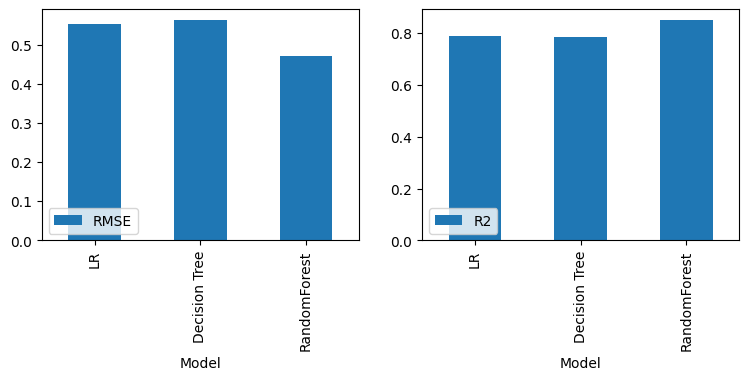

In [144]:
f, axes = plt.subplots(1, 2, figsize=(9, 3), sharey=False)
performance.plot.bar(x = 'Model', y = 'RMSE', ax = axes[0])
axes[0].legend(loc = "lower left")
performance.plot.bar(x = 'Model', y = 'R2', ax = axes[1])
axes[1].legend(loc = "lower left")
plt.show()

From above result, we can see that the randomforest model have the smallest rmse and r2-score. Hence, we will use randomforest model to predict the cost effective score. Below table shows the real and predicted cost effective scores.

In [146]:
y_pred = RF_reg.predict(X)
y_pred = [round(val, 1) for val in y_pred]
df['Predict'] = y_pred
df

,Inner Storage,Card Storage,Available,Design Material Score,Average Score,Camera Score,Connectivity Score,Battery Score,Size,Weight,Battery Storage,Cost Effective Score,Predict
0,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,10.0,9.8
1,12,256,4,8.9,9.2,8.6,8.6,8.2,6.7,205.0,5000.0,10.0,9.8
2,16,256,4,8.9,9.3,8.6,9.2,8.2,6.7,205.0,5000.0,9.9,9.8
3,16,512,4,8.9,9.5,8.6,8.6,8.2,6.7,205.0,5000.0,9.8,9.7
4,8,128,4,8.9,9.1,8.6,9.2,8.2,6.7,205.0,5000.0,9.8,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,12,256,9,7.8,8.9,7.4,8.1,7.7,6.8,235.0,5000.0,8.8,8.8
4521,18,512,9,7.8,9.1,7.4,8.1,7.7,6.8,235.0,5000.0,8.8,8.6
4522,8,128,7,8.1,8.0,7.8,8.7,7.5,6.7,202.0,5000.0,8.8,8.7
4523,12,256,10,7.0,8.9,7.7,7.4,8.9,6.8,239.0,6000.0,8.8,8.8


# Summary

In this project, we scraped the phone features and rating scores to predict the cost effective score. To predict it, we used linear regression, decision tree regressor, randomforest regressor. The randomforest regressor model have the smallest rmse and highest r2-score. It shows that this model fit the data well. The r2-score is 0.847 and we can use this model to predict the cost effective score.